In [15]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
X = digits["data"]

print(X.shape)
X

(1797, 64)


array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [4]:
y = digits["target"]

print(y.shape)
y

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

## Preprocessing

In [5]:
X_mean = X.mean()

X_normalized = X - X_mean
X_normalized

array([[ -4.88416458,  -4.88416458,   0.11583542, ...,  -4.88416458,
         -4.88416458,  -4.88416458],
       [ -4.88416458,  -4.88416458,  -4.88416458, ...,   5.11583542,
         -4.88416458,  -4.88416458],
       [ -4.88416458,  -4.88416458,  -4.88416458, ...,  11.11583542,
          4.11583542,  -4.88416458],
       ..., 
       [ -4.88416458,  -4.88416458,  -3.88416458, ...,   1.11583542,
         -4.88416458,  -4.88416458],
       [ -4.88416458,  -4.88416458,  -2.88416458, ...,   7.11583542,
         -4.88416458,  -4.88416458],
       [ -4.88416458,  -4.88416458,   5.11583542, ...,   7.11583542,
         -3.88416458,  -4.88416458]])

In [6]:
from keras.utils import to_categorical

y_hot = to_categorical(y)

print(y.shape, y_hot.shape)

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


(1797,) (1797, 10)


## Define Activation

### Sigmoid

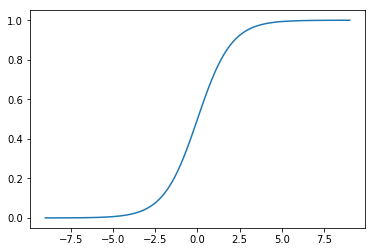

In [18]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9, stop=+9, num=100)
yy = sigmoid(xx)

plt.plot(xx, yy)

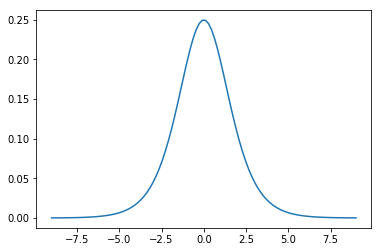

In [17]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(start=-9, stop=+9, num=100)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

## Build a Model

### Small Random Number

In [12]:
from time import time

num_epoch = 100
learning_rate = 0.0001

error_progress_default = []

start = time()

w1 = np.random.uniform(low=-1.0, high=1.0, size=(64, 100))
w2 = np.random.uniform(low=-1.0, high=1.0, size=(100, 100))
w3 = np.random.uniform(low=-1.0, high=1.0, size=(100, 10))

b1 = np.zeros((1, 100))
b2 = np.zeros((1, 100))
b3 = np.zeros((1, 10))

for epoch in range(num_epoch):
    z1 = X.dot(w1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(w2) + b2
    a2 = sigmoid(z2)
    z3 = a2.dot(w3) + b3
    a3 = sigmoid(z3)
    
    y_predict = np.argmax(a3, axis=1)
    error = (y_predict != y).mean()
    
    if epoch % 10 == 0:
        print("{0:2} error = {1:.5f}".format(epoch, error))
        
    error_progress_default.append({
        'epoch': epoch,
        'elapsed': time() - start,
        'error': error,
    })

    d3 = (a3 - y_hot)
    d2 = d3.dot(w3.T) * sigmoid_derivative(z2)
    d1 = d2.dot(w2.T) * sigmoid_derivative(z1)

    w3 = w3 - learning_rate * a2.T.dot(d3)
    b3 = b3 - learning_rate * d3.mean(axis=0)
    
    w2 = w2 - learning_rate * a1.T.dot(d2)
    b2 = b2 - learning_rate * d2.mean(axis=0)

    w1 = w1 - learning_rate * X.T.dot(d1)
    b1 = b1 - learning_rate * d1.mean(axis=0)

print("----" * 10)
print("{0:2} error = {1:.5f}".format(epoch, error))

 0 error = 0.86366
10 error = 0.56873
20 error = 0.39343
30 error = 0.27991
40 error = 0.21369
50 error = 0.17028
60 error = 0.14524
70 error = 0.12465
80 error = 0.10740
90 error = 0.09405
----------------------------------------
99 error = 0.08625


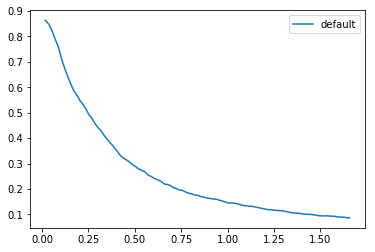

In [24]:
error_progress_default = pd.DataFrame(error_progress_default)

plt.plot(error_progress_default['elapsed'], error_progress_default['error'], label="default")

plt.legend()

### Xavior Initialization

In [25]:
from time import time

num_epoch = 100
learning_rate = 0.0001

error_progress_xavior = []

start = time()

w1 = np.random.uniform(low=-np.sqrt(6 / (64 + 100)), high=np.sqrt(6 / (64 + 100)), size=(64, 100))
w2 = np.random.uniform(low=-np.sqrt(6 / (100 + 100)), high=np.sqrt(6 / (100 + 100)), size=(100, 100))
w3 = np.random.uniform(low=-np.sqrt(6 / (100 + 10)), high=np.sqrt(6 / (100 + 10)), size=(100, 10))

b1 = np.zeros((1, 100))
b2 = np.zeros((1, 100))
b3 = np.zeros((1, 10))

for epoch in range(num_epoch):
    z1 = X_normalized.dot(w1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(w2) + b2
    a2 = sigmoid(z2)
    z3 = a2.dot(w3) + b3
    a3 = sigmoid(z3)
    
    y_predict = np.argmax(a3, axis=1)
    error = (y_predict != y).mean()
    
    if epoch % 10 == 0:
        print("{0:2} error = {1:.5f}".format(epoch, error))
        
    error_progress_xavior.append({
        'epoch': epoch,
        'elapsed': time() - start,
        'error': error,
    })

    d3 = (a3 - y_hot)
    d2 = d3.dot(w3.T) * sigmoid_derivative(z2)
    d1 = d2.dot(w2.T) * sigmoid_derivative(z1)

    w3 = w3 - learning_rate * a2.T.dot(d3)
    b3 = b3 - learning_rate * d3.mean(axis=0)
    
    w2 = w2 - learning_rate * a1.T.dot(d2)
    b2 = b2 - learning_rate * d2.mean(axis=0)

    w1 = w1 - learning_rate * X_normalized.T.dot(d1)
    b1 = b1 - learning_rate * d1.mean(axis=0)

print("----" * 10)
print("{0:2} error = {1:.5f}".format(epoch, error))

 0 error = 0.90039
10 error = 0.43406
20 error = 0.24986
30 error = 0.20757
40 error = 0.17919
50 error = 0.15637
60 error = 0.14190
70 error = 0.12410
80 error = 0.11074
90 error = 0.10072
----------------------------------------
99 error = 0.08959


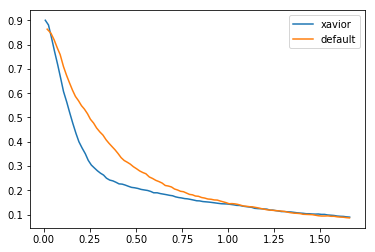

In [27]:
error_progress_xavior = pd.DataFrame(error_progress_xavior)

plt.plot(error_progress_xavior['elapsed'], error_progress_xavior['error'], label="xavior")
plt.plot(error_progress_default['elapsed'], error_progress_default['error'], label="default")

plt.legend()